# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import json
import requests
from api_keys import weather_api_key
from citipy import citipy
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
%matplotlib inline

In [2]:
#print(weather_api_key)

## Generate Cities List

In [17]:
# City name can be found by geographic coordinates (latitude, and longitude): 
# "api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}"

# I will use it to generate list of cities.

num_lat_lon = 3500


latitude = []
longitude = []

#Generating float random numbers (2 decimol) for lat and lon

for num_lat in np.random.uniform(-90,90,num_lat_lon):
    latitude.append(round(num_lat,1))

for num_lon in np.random.uniform(-180,180,num_lat_lon):
    longitude.append(round(num_lon,1))
    

In [18]:
# I have used the citipy library to find the nearest city for all latitudes and longitudes:
#I did "pip install citipy" first

city_list = []
country_list = []

for i in range(num_lat_lon):
    lat = latitude[i]
    lon = longitude[i]
    
    city_search = citipy.nearest_city(lat,lon)
    city = citipy.nearest_city(lat,lon)
    
    city_return = city.city_name
    
    city_list.append(city_return)


In [19]:
# Put data into DataFrame and Check duplicates

city_df = pd.DataFrame({"City Name": city_list})
city_df.value_counts()

#city_df.count()

City Name 
rikitea       129
ushuaia       110
mataura        77
busselton      69
albany         61
             ... 
nelson bay      1
nchelenge       1
navan           1
natal           1
abadiania       1
Length: 1163, dtype: int64

In [20]:
# Getting the duplicate Cities in the DataFrame.

duplicate_city_df = city_df.loc[city_df.duplicated(subset=['City Name']),'City Name'].unique()
#duplicate_city_df

In [21]:
# Create a clean DataFrame by dropping the duplicate from the DataFrame. I should have 500+ cities.

clean_city_df = city_df[city_df['City Name'].isin(duplicate_city_df)==False]
clean_city_df.value_counts()

# Total number of Cities in the clear list

number_cities_inList = len(clean_city_df['City Name'].unique())
print(number_cities_inList)


829


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
#Perform a weather check on each city using a series of successive API calls.

base_url = "http://api.openweathermap.org/data/2.5/weather?"
count=0

#Units
unit = "imperial"

#df_countries.set_value(index,'Temperature (F)',country_info['list'][0]['main']['temp'])

clean_city_df
city_to_find=[]

temperature=[]
humidity=[]
cloudiness=[]
wind_speed=[]
lat=[]
lon=[]
country=[]
date=[]
group = 1
number_city = 0

for index, row in clean_city_df.iterrows():
    
    count = count+1
    
    city_to_find = str(row['City Name'])
    
    #Build query URL
    querly_url = (base_url + "appid=" + weather_api_key + "&q=" + city_to_find+"&units=" + unit).format(city_to_find,weather_api_key)
    
    
    # Get weather data
    city_response = requests.get(querly_url)
    city_json = city_response.json()
    
    try:
        lat.append(city_json['coord']['lat'])
        lon.append(city_json['coord']['lon'])
        country.append(city_json['sys']['country'])
        temperature.append(city_json['main']['temp_max'])
        humidity.append(city_json['main']['humidity'])
        cloudiness.append(city_json['clouds']['all'])
        wind_speed.append(city_json['wind']['speed'])
        date.append(city_json['dt'])
        #print(f"Processing Record {count} of set | {city_to_find}")
        
        #Assining cities to groups 
        if number_city > 49:
            number_city = 0
            group = group + 1
        else:
            number_city = number_city + 1
        
        print(f"Processing Record {count} of set {group} | {city_to_find}")
        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        lat.append(np.nan)
        lon.append(np.nan)
        country.append(np.nan)
        temperature.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)        
        date.append(np.nan)
        
        print("City not found. Skipping")
        pass
    

Processing Record 1 of set 1 | san luis
Processing Record 2 of set 1 | parthenay
Processing Record 3 of set 1 | raudeberg
Processing Record 4 of set 1 | dauriya
Processing Record 5 of set 1 | qujing
Processing Record 6 of set 1 | yaan
Processing Record 7 of set 1 | tadine
Processing Record 8 of set 1 | kidero
Processing Record 9 of set 1 | bubaque
Processing Record 10 of set 1 | cap malheureux
Processing Record 11 of set 1 | calvinia
Processing Record 12 of set 1 | bissau
Processing Record 13 of set 1 | kanigoro
Processing Record 14 of set 1 | marolambo
Processing Record 15 of set 1 | nhamunda
Processing Record 16 of set 1 | wasilla
Processing Record 17 of set 1 | zlobin
Processing Record 18 of set 1 | porto san giorgio
Processing Record 19 of set 1 | burgeo
City not found. Skipping
Processing Record 21 of set 1 | vrangel
Processing Record 22 of set 1 | izumo
Processing Record 23 of set 1 | cobija
Processing Record 24 of set 1 | mantua
Processing Record 25 of set 1 | ambilobe
Processin

Processing Record 204 of set 4 | heinola
Processing Record 205 of set 4 | pedra branca
Processing Record 206 of set 4 | sao gabriel da cachoeira
Processing Record 207 of set 4 | bloemhof
Processing Record 208 of set 4 | armacao de pera
City not found. Skipping
Processing Record 210 of set 4 | tjome
Processing Record 211 of set 4 | hays
Processing Record 212 of set 4 | kamsack
Processing Record 213 of set 4 | asyut
Processing Record 214 of set 4 | kiruna
Processing Record 215 of set 4 | bitam
Processing Record 216 of set 4 | bose
Processing Record 217 of set 4 | nampa
Processing Record 218 of set 4 | palauig
Processing Record 219 of set 5 | kieta
Processing Record 220 of set 5 | eureka
Processing Record 221 of set 5 | winfield
Processing Record 222 of set 5 | borovichi
Processing Record 223 of set 5 | itaituba
Processing Record 224 of set 5 | sawakin
Processing Record 225 of set 5 | andijon
Processing Record 226 of set 5 | bama
Processing Record 227 of set 5 | ploemeur
Processing Record

Processing Record 405 of set 8 | kajaani
Processing Record 406 of set 8 | nyandoma
Processing Record 407 of set 8 | ferreira do alentejo
Processing Record 408 of set 8 | carballo
Processing Record 409 of set 8 | dali
Processing Record 410 of set 8 | baoying
Processing Record 411 of set 8 | dubbo
Processing Record 412 of set 8 | qeshm
Processing Record 413 of set 8 | dawson
Processing Record 414 of set 8 | seoni malwa
Processing Record 415 of set 8 | meridian
Processing Record 416 of set 8 | stromness
Processing Record 417 of set 8 | gavle
Processing Record 418 of set 8 | moreira sales
Processing Record 419 of set 8 | banfora
Processing Record 420 of set 8 | kamina
Processing Record 421 of set 8 | piterka
Processing Record 422 of set 8 | bodden town
Processing Record 423 of set 8 | sakakah
Processing Record 424 of set 8 | atkarsk
Processing Record 425 of set 8 | chekalin
City not found. Skipping
Processing Record 427 of set 8 | namatanai
Processing Record 428 of set 8 | maripi
Processin

Processing Record 601 of set 12 | novoilinsk
City not found. Skipping
Processing Record 603 of set 12 | valky
Processing Record 604 of set 12 | pimentel
Processing Record 605 of set 12 | caraballeda
Processing Record 606 of set 12 | bajil
Processing Record 607 of set 12 | nuevo progreso
Processing Record 608 of set 12 | loa janan
Processing Record 609 of set 12 | miracema do tocantins
Processing Record 610 of set 12 | malanje
Processing Record 611 of set 12 | zhangye
Processing Record 612 of set 12 | barcelos
Processing Record 613 of set 12 | kananga
Processing Record 614 of set 12 | zakopane
City not found. Skipping
City not found. Skipping
Processing Record 617 of set 12 | berbera
City not found. Skipping
Processing Record 619 of set 12 | xiamen
Processing Record 620 of set 12 | itaqui
Processing Record 621 of set 12 | sistranda
Processing Record 622 of set 12 | clinton
Processing Record 623 of set 12 | kodinsk
Processing Record 624 of set 12 | el prat de llobregat
City not found. Sk

Processing Record 797 of set 15 | beitbridge
Processing Record 798 of set 15 | high level
Processing Record 799 of set 15 | ziro
Processing Record 800 of set 15 | otjimbingwe
Processing Record 801 of set 15 | uchiza
Processing Record 802 of set 15 | mehamn
Processing Record 803 of set 15 | atambua
Processing Record 804 of set 15 | chingirlau
Processing Record 805 of set 15 | venado tuerto
Processing Record 806 of set 15 | tripoli
Processing Record 807 of set 15 | etaples
Processing Record 808 of set 15 | poum
Processing Record 809 of set 15 | ahmadpur sial
Processing Record 810 of set 15 | komsomolskiy
Processing Record 811 of set 15 | mezen
City not found. Skipping
Processing Record 813 of set 15 | bundaberg
Processing Record 814 of set 15 | slonim
Processing Record 815 of set 15 | sambava
Processing Record 816 of set 15 | japura
Processing Record 817 of set 15 | kendari
Processing Record 818 of set 15 | coahuayana
Processing Record 819 of set 15 | okhotsk
Processing Record 820 of set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
#Adding values to DataFrame
clean_city_df.insert(1, "Lat", lat, True)
clean_city_df.insert(2, "Lng", lon, True)
clean_city_df.insert(3, "Max Temp", temperature, True)
clean_city_df.insert(4, "Humidity", humidity, True)
clean_city_df.insert(5, "Cloudiness", cloudiness, True)
clean_city_df.insert(6, "Wind Speed", wind_speed, True)
clean_city_df.insert(7, "Country", country, True)
clean_city_df.insert(8, "Date", date, True)

clean_city_df.head(10) #values+Nan

# removing Cities with Nan values
clean_city_df_analise = clean_city_df.dropna(how="any")
clean_city_df_analise.count()

City Name     768
Lat           768
Lng           768
Max Temp      768
Humidity      768
Cloudiness    768
Wind Speed    768
Country       768
Date          768
dtype: int64

In [24]:
#Printing DataFrame
clean_city_df_analise.head()

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,san luis,-33.30,-66.34,63.48,56.0,56.0,22.21,AR,1.603236e+09
7,parthenay,46.67,-0.42,63.00,71.0,100.0,11.99,FR,1.603237e+09
13,raudeberg,61.99,5.14,44.01,94.0,100.0,10.74,NO,1.603236e+09
19,dauriya,49.93,116.87,26.37,86.0,100.0,22.44,RU,1.603237e+09
25,qujing,25.48,103.78,45.66,88.0,100.0,8.86,CN,1.603237e+09


In [25]:
#Statistics
clean_city_df_analise.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02
mean,20.995521,25.395755,61.766536,72.850260,53.466146,6.780026,1.603237e+09
std,29.258936,79.067792,19.211486,22.458415,39.739653,4.812805,1.388580e+02
min,-43.630000,-158.090000,-0.400000,1.000000,0.000000,0.340000,1.603236e+09
25%,-3.677500,-48.392500,47.530000,61.750000,8.000000,3.360000,1.603237e+09
50%,24.790000,30.400000,66.945000,79.000000,66.000000,5.820000,1.603237e+09
75%,45.475000,87.657500,77.117500,90.000000,92.000000,9.100000,1.603237e+09
max,71.040000,177.480000,96.800000,100.000000,100.000000,32.700000,1.603237e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
# Humidity > 100%
#clean_city_df_analise['Humidity'].astype(float)
clean_city_df_analise.head()

#To show Cities with HUmidity > 100

to_drop=[]

to_drop = clean_city_df_analise.index[clean_city_df_analise['Humidity'] > 100]

print(to_drop)

clean_city_df_analise
clean_city_df_analise.count()

Int64Index([], dtype='int64')


City Name     768
Lat           768
Lng           768
Max Temp      768
Humidity      768
Cloudiness    768
Wind Speed    768
Country       768
Date          768
dtype: int64

In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Create a clean DataFrame by dropping the Cities with Humidity>100.

clean_city_data = clean_city_df_analise[clean_city_df_analise.index.isin(to_drop)==False]
clean_city_data
clean_city_data.count()


City Name     768
Lat           768
Lng           768
Max Temp      768
Humidity      768
Cloudiness    768
Wind Speed    768
Country       768
Date          768
dtype: int64

In [28]:
#Statistics for the final clear dataframe
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02
mean,20.995521,25.395755,61.766536,72.850260,53.466146,6.780026,1.603237e+09
std,29.258936,79.067792,19.211486,22.458415,39.739653,4.812805,1.388580e+02
min,-43.630000,-158.090000,-0.400000,1.000000,0.000000,0.340000,1.603236e+09
25%,-3.677500,-48.392500,47.530000,61.750000,8.000000,3.360000,1.603237e+09
50%,24.790000,30.400000,66.945000,79.000000,66.000000,5.820000,1.603237e+09
75%,45.475000,87.657500,77.117500,90.000000,92.000000,9.100000,1.603237e+09
max,71.040000,177.480000,96.800000,100.000000,100.000000,32.700000,1.603237e+09


In [29]:
# Saving city data into a csv file
clean_city_data.to_csv("output_data/cities.csv", index = False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

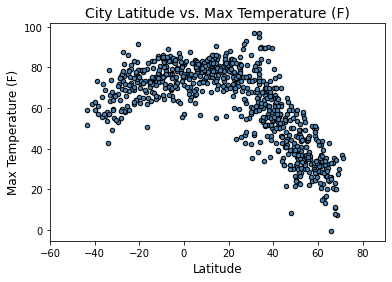

In [45]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'],color = 'blue',s=20, facecolor = "steelblue", edgecolor = "black")
plt.title('City Latitude vs. Max Temperature (F)',fontsize=(14));
plt.xlim(-60,90)
plt.ylabel('Max Temperature (F)',fontsize=(12));
plt.xlabel('Latitude',fontsize=(12));

# Save the plotted figure as .pngs
plt.savefig("Images/City_Latitude_vs_Max_Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

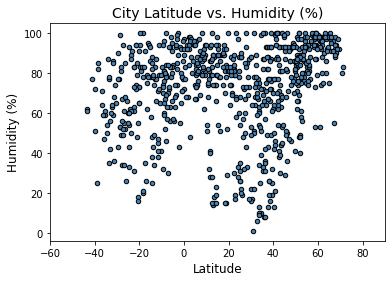

In [46]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'],color = 'blue',s=20, facecolor = "steelblue", edgecolor = "black")
plt.title('City Latitude vs. Humidity (%)',fontsize=(14));
plt.xlim(-60,90)
plt.ylabel('Humidity (%)',fontsize=(12));
plt.xlabel('Latitude',fontsize=(12));

# Save the plotted figure as .pngs
plt.savefig("Images/City_Latitude_vs_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

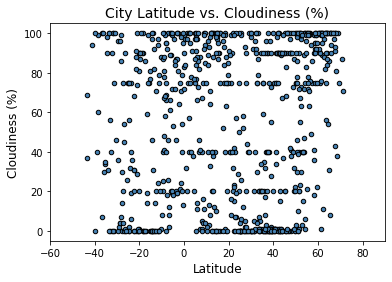

In [47]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'],color = 'blue',s=20, facecolor = "steelblue", edgecolor = "black")
plt.title('City Latitude vs. Cloudiness (%)',fontsize=(14));
plt.xlim(-60,90)
plt.ylabel('Cloudiness (%)',fontsize=(12));
plt.xlabel('Latitude',fontsize=(12));

# Save the plotted figure as .pngs
plt.savefig("Images/City_Latitude_vs_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

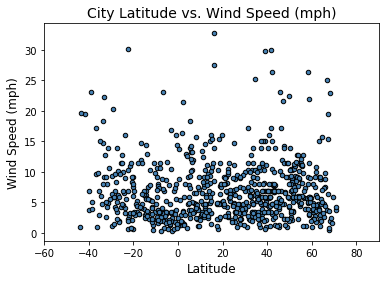

In [48]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'],color = 'blue',s=20, facecolor = "steelblue", edgecolor = "black")
plt.title('City Latitude vs. Wind Speed (mph)',fontsize=(14));
plt.xlim(-60,90)
plt.ylabel('Wind Speed (mph)',fontsize=(12));
plt.xlabel('Latitude',fontsize=(12));

# Save the plotted figure as .pngs
plt.savefig("Images/City_Latitude_vs_Wind_Speed.png")

plt.show()

## Linear Regression

In [49]:
north_hemisphere=pd.DataFrame({})
south_hemisphere=pd.DataFrame({})

north_hemisphere = clean_city_data[clean_city_data['Lat'] >=0]
north_hemisphere

south_hemisphere = clean_city_data[clean_city_data['Lat'] <=0]
south_hemisphere.dtypes

City Name      object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date          float64
dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.6928352119310256


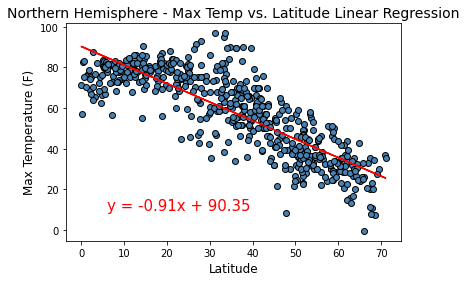

In [50]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere["Max Temp"]

#R-value:
corr=round(st.pearsonr(x_axis,y_axis)[0],2)


#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The r-value is {rvalue**2}")

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression',fontsize=(14))
plt.ylabel('Max Temperature (F)',fontsize=(12))
plt.xlabel('Latitude',fontsize=(12))

# Save the plotted figure as .pngs
plt.savefig("Images/Northern_Hemisphere_City_Latitude_vs_Max_Temperature.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.29777248084213165


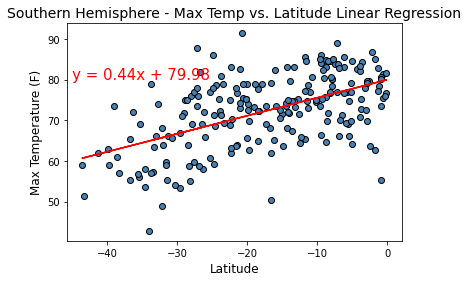

In [51]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere["Max Temp"]

#R-value:
#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The r-value is {rvalue**2}")

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-45,80),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression',fontsize=(14))
plt.ylabel('Max Temperature (F)',fontsize=(12))
plt.xlabel('Latitude',fontsize=(12))

# Save the plotted figure as .pngs
plt.savefig("Images/Southern_Hemisphere_City_Latitude_vs_Max_Temperature.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.29777248084213165


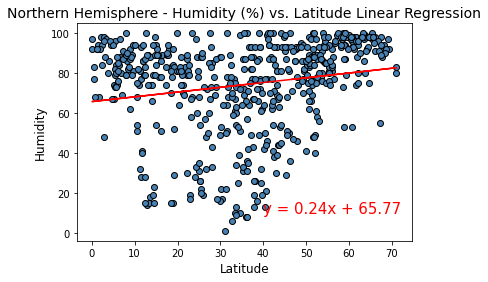

In [52]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere["Humidity"]

#R-value:
print(f"The r-value is {rvalue**2}")

#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression',fontsize=(14))
plt.ylabel('Humidity',fontsize=(12))
plt.xlabel('Latitude',fontsize=(12))

# Save the plotted figure as .pngs
plt.savefig("Images/Northern_Hemisphere_City_Latitude_vs_Humidity.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.036520078332717434


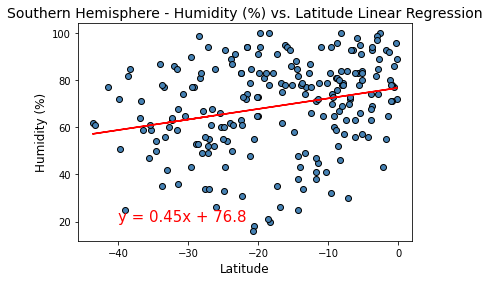

In [53]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere["Humidity"]

#R-value:
print(f"The r-value is {rvalue**2}")

#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression',fontsize=(14))
plt.ylabel('Humidity (%)',fontsize=(12))
plt.xlabel('Latitude',fontsize=(12))

# Save the plotted figure as .pngs
plt.savefig("Images/Southern_Hemisphere_City_Latitude_vs_Humidity.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.06510856728144215


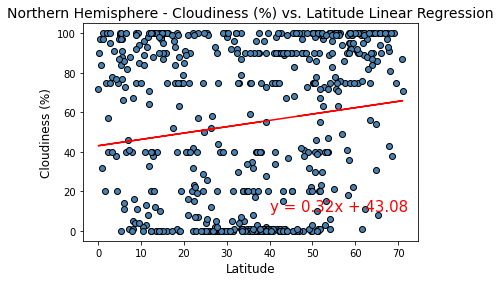

In [54]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere["Cloudiness"]

#R-value:
print(f"The r-value is {rvalue**2}")

#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',fontsize=(14))
plt.ylabel('Cloudiness (%)',fontsize=(12))
plt.xlabel('Latitude',fontsize=(12))

# Save the plotted figure as .pngs
plt.savefig("Images/Northern_Hemisphere_City_Latitude_vs_Cloudiness.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.02222779724000044


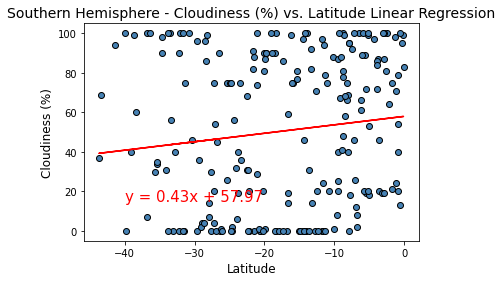

In [55]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere["Cloudiness"]

#R-value:
print(f"The r-value is {rvalue**2}")

#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,15),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',fontsize=(14))
plt.ylabel('Cloudiness (%)',fontsize=(12))
plt.xlabel('Latitude',fontsize=(12))

# Save the plotted figure as .pngs
plt.savefig("Images/Southern_Hemisphere_City_Latitude_vs_Cloudiness.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.00022051436367263692


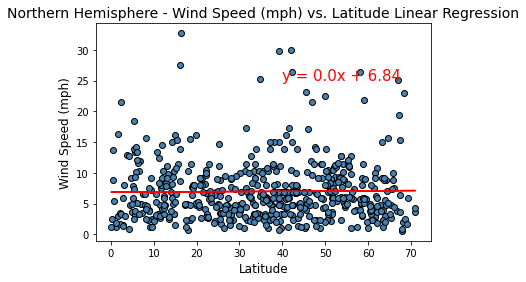

In [57]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere["Wind Speed"]

#R-value:
print(f"The r-value is {rvalue**2}")

#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression',fontsize=(14))
plt.ylabel('Wind Speed (mph)',fontsize=(12))
plt.xlabel('Latitude',fontsize=(12))

# Save the plotted figure as .pngs
plt.savefig("Images/Northern_Hemisphere_City_Latitude_vs_Wind_Speed.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.00022051436367263692


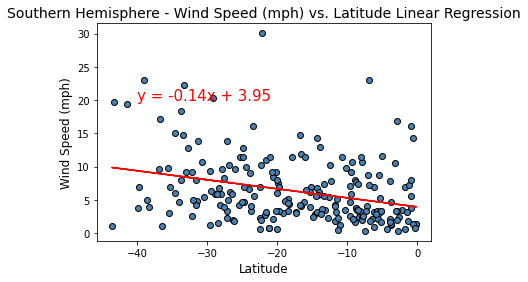

In [58]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere["Wind Speed"]

#R-value:
print(f"The r-value is {rvalue**2}")

#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression',fontsize=(14))
plt.xlabel('Latitude',fontsize=(12))
plt.ylabel('Wind Speed (mph)',fontsize=(12))

# Save the plotted figure as .pngs
plt.savefig("Images/Southern_Hemisphere_City_Latitude_vs_Wind_Speed.png")

plt.show()